In [ ]:
import os
from PIL import Image
import numpy as np
path="/content/drive/My Drive/manual_process/test_process_normal"
imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
inp=[]
y=[]
for imagePath in imagePaths:
  im = Image.open(imagePath)
  #print(np.array(im).reshape(128,128,1).shape)
  inp.append(np.array(im).reshape(128,128,1))
  y.append([0])


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-566f1f136993>", line 9, in <module>
    im = Image.open(imagePath)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2818, in open
    prefix = fp.read(16)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines

KeyboardInterrupt: ignored

In [ ]:
import os
from PIL import Image
import numpy as np
path="/content/drive/My Drive/manual_process/test_process_notnormal"
imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
for imagePath in imagePaths:
  im = Image.open(imagePath)
  #print(np.array(im).reshape(128,128,1).shape)
  inp.append(np.array(im).reshape(128,128,1))
  y.append([1])


In [ ]:
import pickle
with open('/content/drive/My Drive/manual_process/inp.pkl','wb') as f:
     pickle.dump(inp, f)
with open('/content/drive/My Drive/manual_process/out.pkl','wb') as f:
     pickle.dump(y, f)

In [1]:
import pickle
import pandas as pd
inp=pd.read_pickle('/content/drive/My Drive/manual_process/inp.pkl')
y=pd.read_pickle('/content/drive/My Drive/manual_process/out.pkl')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb300323be0>]],
      dtype=object)

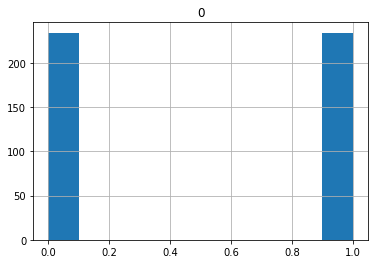

In [2]:
import pandas as pd
y=pd.DataFrame(y)
y.hist()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp,y, test_size=0.33, random_state=42)

In [4]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)

In [5]:
X_train.shape

(313, 128, 128, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f4b87e80>]],
      dtype=object)

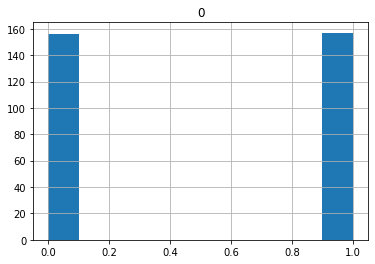

In [6]:
y_train.hist() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3013a1748>]],
      dtype=object)

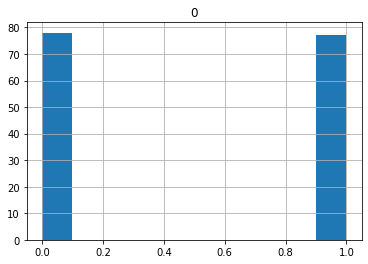

In [7]:
y_test.hist()

In [8]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=5,validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 15s 594ms/step - loss: 0.5154 - accuracy: 0.7400 - val_loss: 0.2753 - val_accuracy: 0.9048
Epoch 2/5
25/25 [==============================] - 15s 581ms/step - loss: 0.3340 - accuracy: 0.8560 - val_loss: 0.4181 - val_accuracy: 0.8095
Epoch 3/5
25/25 [==============================] - 15s 581ms/step - loss: 0.2267 - accuracy: 0.9080 - val_loss: 0.2103 - val_accuracy: 0.9048
Epoch 4/5
25/25 [==============================] - 15s 580ms/step - loss: 0.1507 - accuracy: 0.9520 - val_loss: 0.2822 - val_accuracy: 0.8889
Epoch 5/5
25/25 [==============================] - 15s 581ms/step - loss: 0.1206 - accuracy: 0.9560 - val_loss: 0.2147 - val_accuracy: 0.9206


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 246016)            0

In [10]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8903225806451613

In [11]:
#model.save('/content/drive/My Drive/manual_process/model1.h5')

In [ ]:
xfrom tensorflow import keras
model1=keras.Sequential()
model1.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,batch_size=10,epochs=5,validation_split=0.2)

Epoch 1/5
25/25 [==============================] - 8s 302ms/step - loss: 0.6126 - accuracy: 0.7200 - val_loss: 0.4567 - val_accuracy: 0.7778
Epoch 2/5
25/25 [==============================] - 7s 299ms/step - loss: 0.3852 - accuracy: 0.8320 - val_loss: 0.2193 - val_accuracy: 0.8730
Epoch 3/5
25/25 [==============================] - 8s 302ms/step - loss: 0.2830 - accuracy: 0.8920 - val_loss: 0.1789 - val_accuracy: 0.9365
Epoch 4/5
25/25 [==============================] - 8s 304ms/step - loss: 0.1645 - accuracy: 0.9520 - val_loss: 0.2103 - val_accuracy: 0.9048
Epoch 5/5
25/25 [==============================] - 8s 304ms/step - loss: 0.1244 - accuracy: 0.9520 - val_loss: 0.2978 - val_accuracy: 0.8413


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 123008)           

In [ ]:
y_pred=model1.predict_classes(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8451612903225807

In [ ]:
#model1.save('/content/drive/My Drive/manual_process/model2.h5')

In [ ]:
from tensorflow import keras
model1=keras.Sequential()
model1.add(keras.layers.InputLayer(input_shape=(128,128,1)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model1.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(1,activation='sigmoid'))
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(X_train,y_train,batch_size=10,epochs=3,validation_split=0.2)

Epoch 1/3
25/25 [==============================] - 47s 2s/step - loss: 0.6745 - accuracy: 0.6760 - val_loss: 0.4182 - val_accuracy: 0.8254
Epoch 2/3
25/25 [==============================] - 45s 2s/step - loss: 0.3357 - accuracy: 0.8720 - val_loss: 1.1626 - val_accuracy: 0.6349
Epoch 3/3
25/25 [==============================] - 46s 2s/step - loss: 0.2149 - accuracy: 0.9040 - val_loss: 1.2022 - val_accuracy: 0.6508


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 492032)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 492032)           

In [ ]:
y_pred=model1.predict_classes(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6

In [ ]:
#model1.save('/content/drive/My Drive/manual_process/model3.h5')

In [ ]:
from keras.models import load_model
m1 = load_model('/content/drive/My Drive/manual_process/model1.h5')
m2 = load_model('/content/drive/My Drive/manual_process/model2.h5')
m3 = load_model('/content/drive/My Drive/manual_process/model3.h5')

In [ ]:
y1=m1.predict_proba(X_test)
y2=model1.predict_proba(X_test)
y3=m2.predict_proba(X_test)
y1=(y1+y2+y3)/3
y3=y1.round()
accuracy_score(y3, y_test)

Instructions for updating:
Please use `model.predict()` instead.


Instructions for updating:
Please use `model.predict()` instead.


0.9032258064516129